This script is an exmaple for creating and fitting PSDs of data. Currently loads in .mat files.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

In [107]:
def load_data(filepath, channels):
    data = sio.loadmat(filepath)
    tts = np.zeros((len(channels), data['Length'][0][0]))
    for n, i in enumerate(channels):
        tt = np.transpose(data[i])[0]
        tts[n] = tt
    return tts, data['Tinterval'][0][0]

def linewidth(f, f0, A, y, c):
    return A/((f**2-f0**2)**2+(f*y)**2) + c

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

def fit_and_plot_PSD(PSD, lb, ub, p0):
    PSDs_fitted = []
    PSD_fits = []
    for i in PSD:
        pop, cov = opt.curve_fit(linewidth, i[0][lb:ub], i[1][lb:ub], p0 = p0)
        PSD_fits.append(pop)
        PSD_fitted = linewidth(i[0], pop[0], pop[1], pop[2], pop[3])
        PSDs_fitted.append(PSD_fitted)

    plt.figure(figsize = (5, 5))
    for n, i in enumerate(PSD):
        plt.plot(i[0][lb:ub]/1000, i[1][lb:ub])
        plt.plot(i[0][lb:ub]/1000, PSDs_fitted[n][lb:ub])
    plt.yscale('log')
    plt.ylabel('PSD (V$^2$/Hz)')
    plt.xlabel('Frequency (kHz)')
    plt.show()

    
    return PSD_fits, PSDs_fitted

In [154]:
filepathYB = 'D:\\Experiment\\Trapping\\230626\\Y89\\'
filepathM1 = 'D:\\Experiment\\Trapping\\230626\\Methanol\\'
filepathM2 = 'D:\\Experiment\\Trapping\\230627\\Methanol\\'
channels = ['A', 'B']

extensionsYB_1 = []
for i in range(1, 6):
    extensionsYB_1.append('Particle ' + str(i) + '\\tt1.mat')

extensionsYB_2 = []
for i in range(1, 6):
    extensionsYB_2.append('Particle ' + str(i) + '\\tt2.mat')

extensionsM_1 = []
for i in range(1, 3):
    extensionsM_1.append('Particle ' + str(i) + '\\tt1.mat')

extensionsM_21 = []
for i in range(2, 3):
    extensionsM_21.append('Particle ' + str(i) + '\\tt2.mat')

extensionsM_22 = []
for i in range(1, 3):
    extensionsM_22.append('Particle ' + str(i) + '\\tt2.mat')

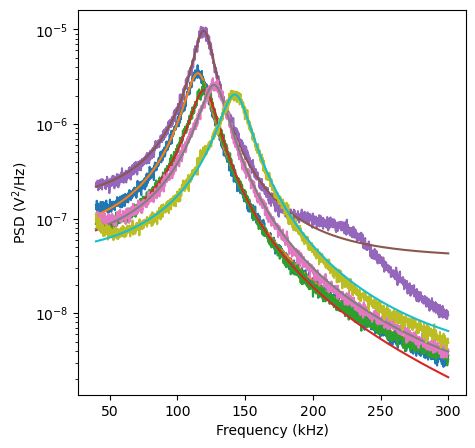

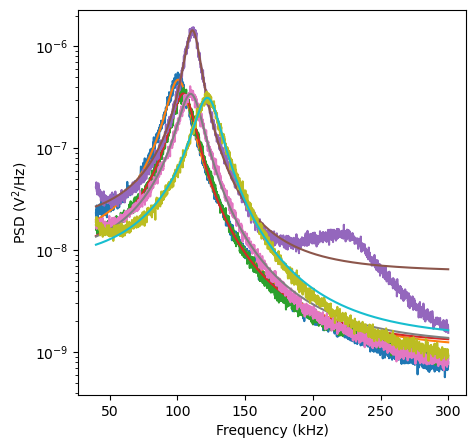

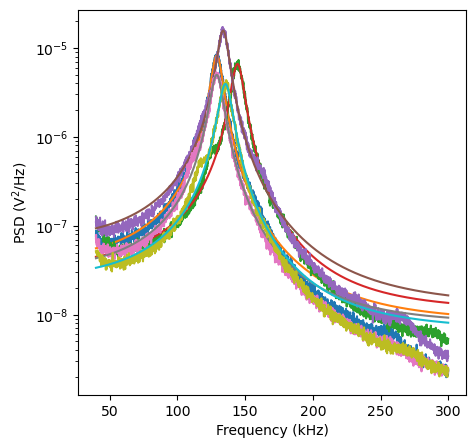

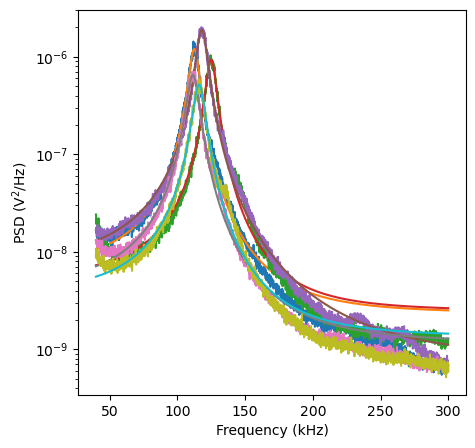

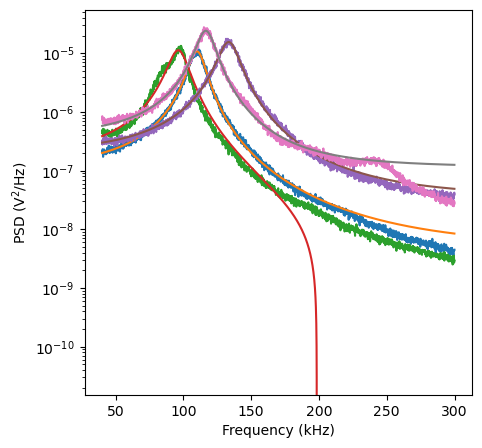

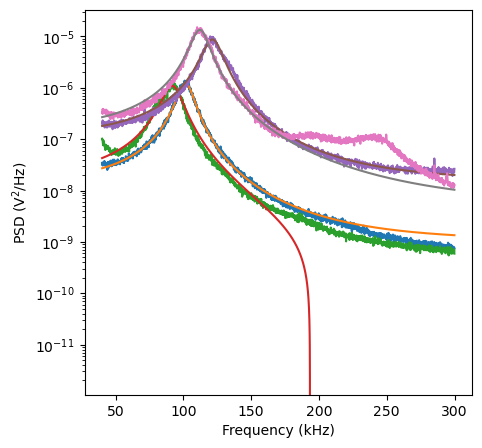

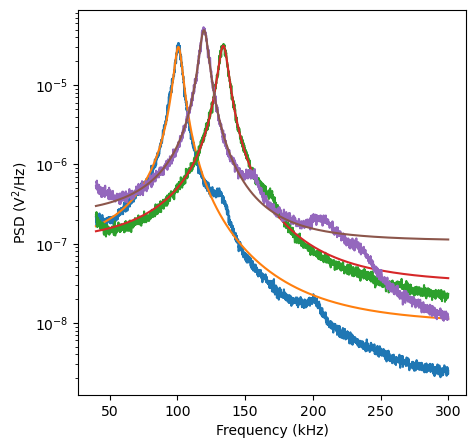

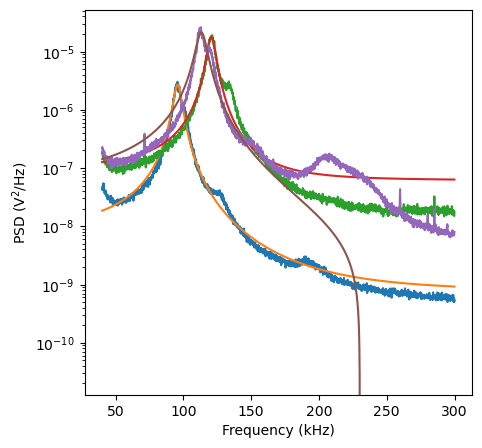

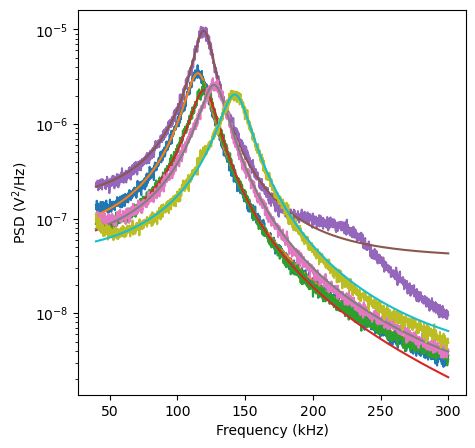

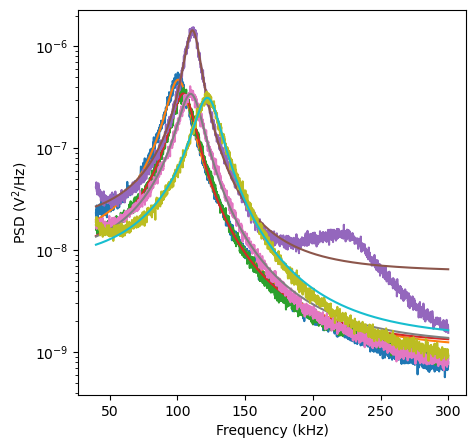

In [157]:
p0 = [1.3e5, 1e14, 1e4, 1e-10]

PSDA_YB1, PSDB_YB1 = make_PSDs(filepathYB, extensionsYB_1, channels)
PSDA_YB1_fits, PSDA_YB1_fitted = fit_and_plot_PSD(PSDA_YB1, int(0.01*40000), int(0.01*300000), p0 = p0)
PSDB_YB1_fits, PSDB_YB1_fitted = fit_and_plot_PSD(PSDB_YB1, int(0.01*40000), int(0.01*300000), p0 = p0)

PSDA_YB2, PSDB_YB2 = make_PSDs(filepathYB, extensionsYB_2, channels)
PSDA_YB2_fits, PSDA_YB2_fitted = fit_and_plot_PSD(PSDA_YB2, int(0.01*40000), int(0.01*300000), p0 = p0)
PSDB_YB2_fits, PSDB_YB2_fitted = fit_and_plot_PSD(PSDB_YB2, int(0.01*40000), int(0.01*300000), p0 = p0)

PSDA_M1_1, PSDB_M1_1 = make_PSDs(filepathM1, extensionsM_1, channels)
PSDA_M1_2, PSDB_M1_2 = make_PSDs(filepathM2, extensionsM_1, channels)
PSDA_M1 = np.concatenate((PSDA_M1_1, PSDA_M1_2))
PSDB_M1 = np.concatenate((PSDB_M1_1, PSDB_M1_2))
PSDA_M1_fits, PSDA_M1_fitted = fit_and_plot_PSD(PSDA_M1, int(0.01*40000), int(0.01*300000), p0 = p0)
PSDB_M1_fits, PSDB_M1_fitted = fit_and_plot_PSD(PSDB_M1, int(0.01*40000), int(0.01*300000), p0 = p0)

PSDA_M2_1, PSDB_M2_1 = make_PSDs(filepathM1, extensionsM_21, channels)
PSDA_M2_2, PSDB_M2_2 = make_PSDs(filepathM2, extensionsM_22, channels)
PSDA_M2 = np.concatenate((PSDA_M2_1, PSDA_M2_2))
PSDB_M2 = np.concatenate((PSDB_M2_1, PSDB_M2_2))
PSDA_M2_fits, PSDA_M2_fitted = fit_and_plot_PSD(PSDA_M2, int(0.01*40000), int(0.01*300000), p0 = p0)
PSDB_M2_fits, PSDB_M2_fitted = fit_and_plot_PSD(PSDB_M2, int(0.01*40000), int(0.01*300000), p0 = p0)

PSDA_YB1, PSDB_YB1 = make_PSDs(filepathYB, extensionsYB_1, channels)
PSDA_YB1_fits, PSDA_YB1_fitted = fit_and_plot_PSD(PSDA_YB1, int(0.01*40000), int(0.01*300000), p0 = p0)
PSDB_YB1_fits, PSDB_YB1_fitted = fit_and_plot_PSD(PSDB_YB1, int(0.01*40000), int(0.01*300000), p0 = p0)

In [184]:
filepathSi = 'D:\\Experiment\\Trapping\\230628\\Silica\\'

extensionsSi_1 = []
for i in [1, 2, 4,5, 6]:
    extensionsSi_1.append('Particle ' + str(i) + '\\tt1.mat')

extensionsSi_2 = []
for i in [1, 2, 4,5, 6]:
    extensionsSi_2.append('Particle ' + str(i) + '\\tt2.mat')

extensionsSi_3 = []
for i in [1, 2, 5, 6]:
    extensionsSi_3.append('Particle ' + str(i) + '\\tt3.mat')

extensionsSi_4 = []
for i in [1, 2, 5, 6]:
    extensionsSi_4.append('Particle ' + str(i) + '\\tt4.mat')

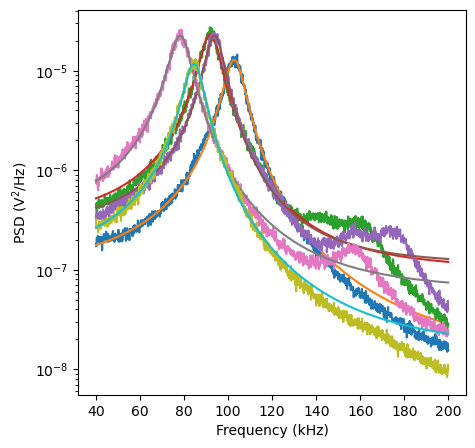

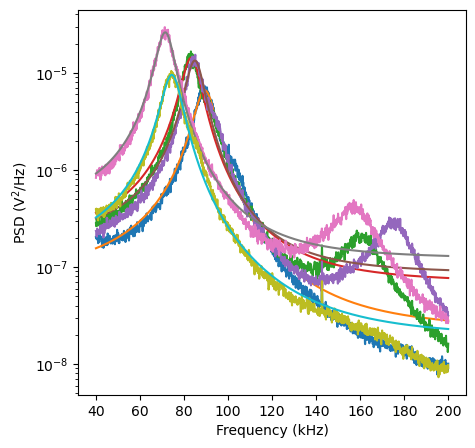

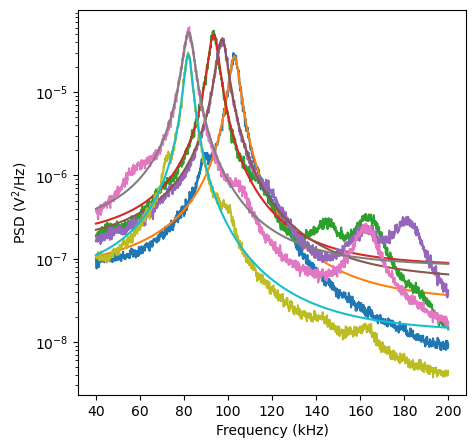

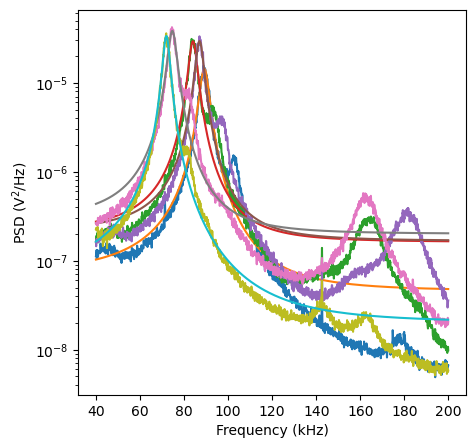

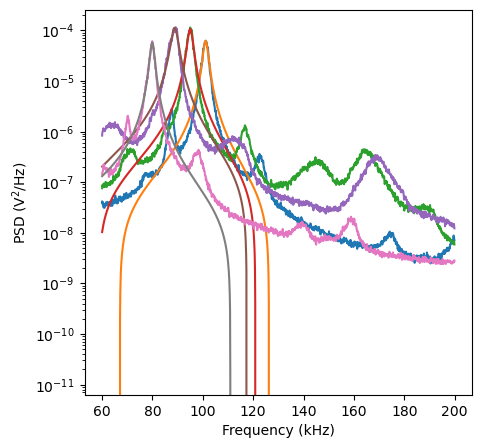

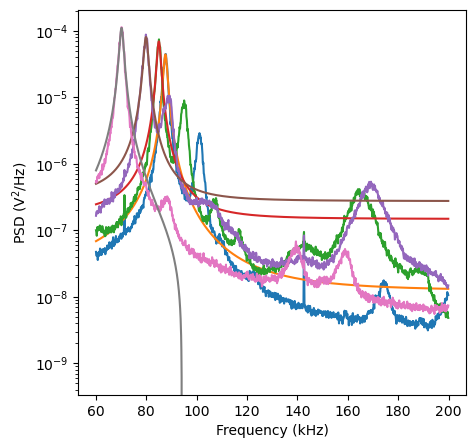

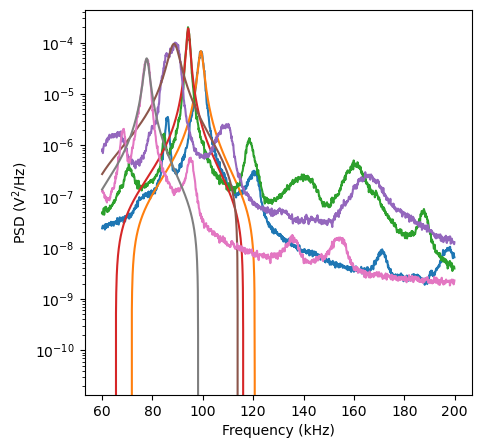

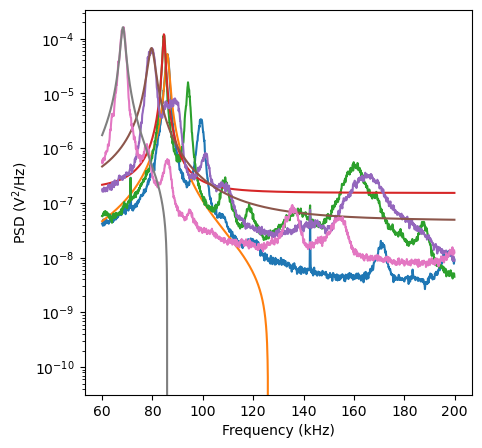

In [185]:
p0 = [9.5e4, 1e14, 1e4, 1e-10]

PSDA_Si1, PSDB_Si1 = make_PSDs(filepathSi, extensionsSi_1, channels)
PSDA_Si1_fits, PSDA_Si1_fitted = fit_and_plot_PSD(PSDA_Si1, int(0.01*40000), int(0.01*200000), p0 = p0)
PSDB_Si1_fits, PSDB_Si1_fitted = fit_and_plot_PSD(PSDB_Si1, int(0.01*40000), int(0.01*200000), p0 = p0)

PSDA_Si2, PSDB_Si2 = make_PSDs(filepathSi, extensionsSi_2, channels)
PSDA_Si2_fits, PSDA_Si2_fitted = fit_and_plot_PSD(PSDA_Si2, int(0.01*40000), int(0.01*200000), p0 = p0)
PSDB_Si2_fits, PSDB_Si2_fitted = fit_and_plot_PSD(PSDB_Si2, int(0.01*40000), int(0.01*200000), p0 = p0)

PSDA_Si3, PSDB_Si3 = make_PSDs(filepathSi, extensionsSi_3, channels)
PSDA_Si3_fits, PSDA_Si3_fitted = fit_and_plot_PSD(PSDA_Si3, int(0.01*60000), int(0.01*200000), p0 = p0)
PSDB_Si3_fits, PSDB_Si3_fitted = fit_and_plot_PSD(PSDB_Si3, int(0.01*60000), int(0.01*200000), p0 = p0)

PSDA_Si4, PSDB_Si4 = make_PSDs(filepathSi, extensionsSi_4, channels)
PSDA_Si4_fits, PSDA_Si4_fitted = fit_and_plot_PSD(PSDA_Si4, int(0.01*60000), int(0.01*200000), p0 = p0)
PSDB_Si4_fits, PSDB_Si4_fitted = fit_and_plot_PSD(PSDB_Si4, int(0.01*60000), int(0.01*200000), p0 = p0)

In [186]:
hp_YB_A_cf = np.transpose(PSDA_YB1_fits)[0]/1000
hp_YB_B_cf = np.transpose(PSDB_YB1_fits)[0]/1000
lp_YB_A_cf = np.transpose(PSDA_YB2_fits)[0]/1000
lp_YB_B_cf = np.transpose(PSDB_YB2_fits)[0]/1000

hp_YB_A_lw = np.transpose(PSDA_YB1_fits)[2]/1000
hp_YB_B_lw = np.transpose(PSDB_YB1_fits)[2]/1000
lp_YB_A_lw = np.transpose(PSDA_YB2_fits)[2]/1000
lp_YB_B_lw = np.transpose(PSDB_YB2_fits)[2]/1000

hp_M_A_cf = np.transpose(PSDA_M1_fits)[0]/1000
hp_M_B_cf = np.transpose(PSDB_M1_fits)[0]/1000
lp_M_A_cf = np.transpose(PSDA_M2_fits)[0]/1000
lp_M_B_cf = np.transpose(PSDB_M2_fits)[0]/1000

hp_M_A_lw = np.transpose(PSDA_M1_fits)[2]/1000
hp_M_B_lw = np.transpose(PSDB_M1_fits)[2]/1000
lp_M_A_lw = np.transpose(PSDA_M2_fits)[2]/1000
lp_M_B_lw = np.transpose(PSDB_M2_fits)[2]/1000

hp_Si_A_cf = np.transpose(PSDA_Si1_fits)[0]/1000
hp_Si_B_cf = np.transpose(PSDB_Si1_fits)[0]/1000
lp_Si_A_cf = np.transpose(PSDA_Si2_fits)[0]/1000
lp_Si_B_cf = np.transpose(PSDB_Si2_fits)[0]/1000

hp_Si_A_lw = np.transpose(PSDA_Si1_fits)[2]/1000
hp_Si_B_lw = np.transpose(PSDB_Si1_fits)[2]/1000
lp_Si_A_lw = np.transpose(PSDA_Si2_fits)[2]/1000
lp_Si_B_lw = np.transpose(PSDB_Si2_fits)[2]/1000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


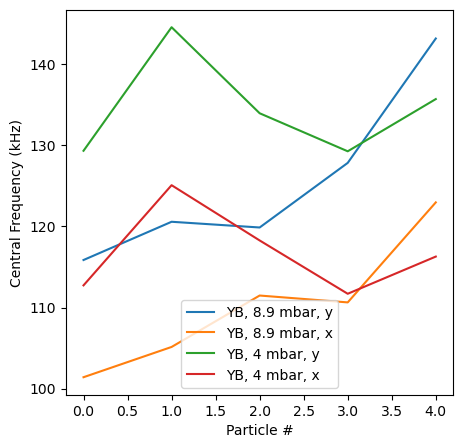

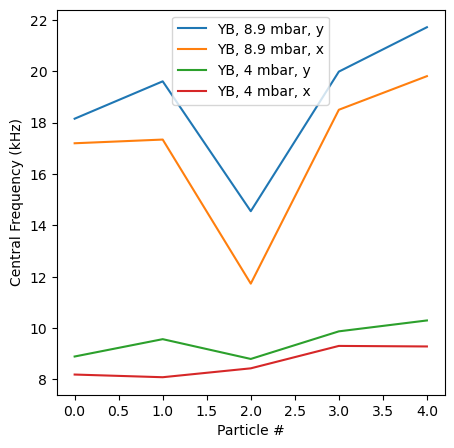

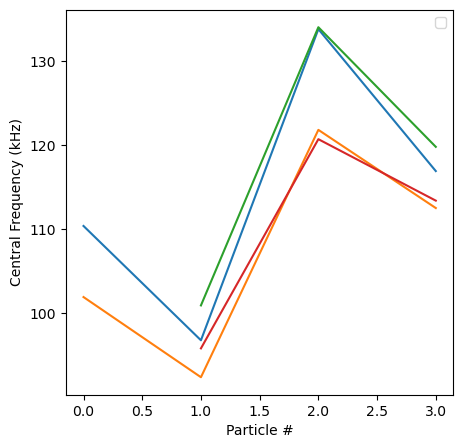

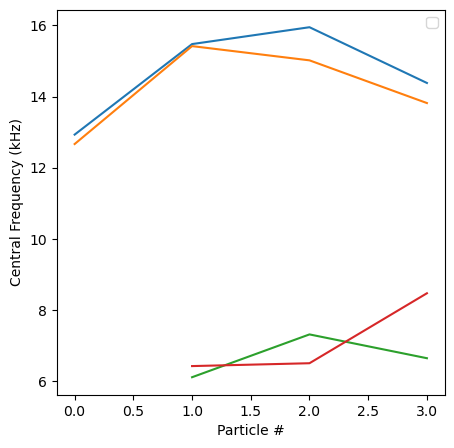

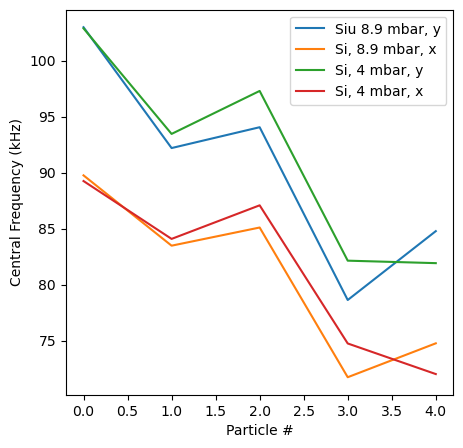

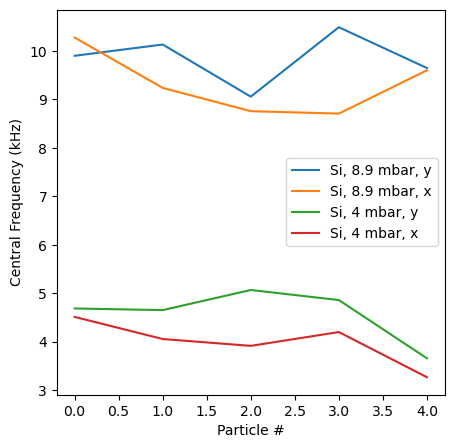

In [187]:
plt.figure(figsize = (5,5))
plt.plot(hp_YB_A_cf, label = 'YB, 8.9 mbar, y')
plt.plot(hp_YB_B_cf, label = 'YB, 8.9 mbar, x')
plt.plot(lp_YB_A_cf, label = 'YB, 4 mbar, y')
plt.plot(lp_YB_B_cf, label = 'YB, 4 mbar, x')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle #')
plt.legend()

plt.figure(figsize = (5,5))
plt.plot(hp_YB_A_lw, label = 'YB, 8.9 mbar, y')
plt.plot(hp_YB_B_lw, label = 'YB, 8.9 mbar, x')
plt.plot(lp_YB_A_lw, label = 'YB, 4 mbar, y')
plt.plot(lp_YB_B_lw, label = 'YB, 4 mbar, x')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle #')
plt.legend()

plt.figure(figsize = (5,5))
plt.plot(hp_M_A_cf)
plt.plot(hp_M_B_cf)
plt.plot([1,2,3], lp_M_A_cf)
plt.plot([1,2,3], lp_M_B_cf)
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle #')
plt.legend()

plt.figure(figsize = (5,5))
plt.plot(hp_M_A_lw)
plt.plot(hp_M_B_lw)
plt.plot([1,2,3], lp_M_A_lw)
plt.plot([1,2,3], lp_M_B_lw)
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle #')
plt.legend()

plt.figure(figsize = (5,5))
plt.plot(hp_Si_A_cf, label = 'Siu 8.9 mbar, y')
plt.plot(hp_Si_B_cf, label = 'Si, 8.9 mbar, x')
plt.plot(lp_Si_A_cf, label = 'Si, 4 mbar, y')
plt.plot(lp_Si_B_cf, label = 'Si, 4 mbar, x')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle #')
plt.legend()

plt.figure(figsize = (5,5))
plt.plot(hp_Si_A_lw, label = 'Si, 8.9 mbar, y')
plt.plot(hp_Si_B_lw, label = 'Si, 8.9 mbar, x')
plt.plot(lp_Si_A_lw, label = 'Si, 4 mbar, y')
plt.plot(lp_Si_B_lw, label = 'Si, 4 mbar, x')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle #')
plt.legend()

In [320]:
## Scale for power

print(hp_YB_A_cf)
print(hp_YB_B_cf)
print(lp_YB_A_cf)
print(lp_YB_B_cf)

hp_YB_A_cf[0:2] = hp_YB_A_cf[0:2]*np.sqrt(550/600) 
hp_YB_B_cf[0:2] = hp_YB_B_cf[0:2]*np.sqrt(550/600)
lp_YB_A_cf[0:2] = lp_YB_A_cf[0:2]*np.sqrt(550/600)
lp_YB_B_cf[0:2] = lp_YB_B_cf[0:2]*np.sqrt(550/600)

print(hp_YB_A_cf)
print(hp_YB_B_cf)
print(lp_YB_A_cf)
print(lp_YB_B_cf)

[115.86122824 120.58063595 119.87455897 127.84751808 143.19673909]
[101.39624129 105.13132365 111.47782268 110.63082597 122.97342481]
[129.3419882  144.58948812 133.97199229 129.2778731  135.72178627]
[112.73217863 125.09416186 118.27536826 111.69604015 116.28548075]
[110.92868065 115.44716953 119.87455897 127.84751808 143.19673909]
[ 97.07951003 100.65557913 111.47782268 110.63082597 122.97342481]
[123.83552567 138.43389542 133.97199229 129.2778731  135.72178627]
[107.93284374 119.76854159 118.27536826 111.69604015 116.28548075]


In [321]:
print(np.mean(hp_YB_A_cf), np.std(np.transpose(hp_YB_A_cf)))
print(np.mean(hp_M_A_cf), np.std(np.transpose(hp_M_A_cf)))
print(np.mean(hp_Si_A_cf), np.std(np.transpose(hp_Si_A_cf)))

print(np.mean(hp_YB_A_lw), np.std(np.transpose(hp_YB_A_lw)))
print(np.mean(hp_M_A_lw), np.std(np.transpose(hp_M_A_lw)))
print(np.mean(hp_Si_A_lw), np.std(np.transpose(hp_Si_A_lw)))

hp_YB_A_cf_mean, hp_YB_A_cf_std = np.mean(hp_YB_A_cf), np.std(np.transpose(hp_YB_A_cf))
hp_M_A_cf_mean, hp_M_A_cf_std = np.mean(hp_M_A_cf), np.std(np.transpose(hp_M_A_cf))
hp_Si_A_cf_mean, hp_Si_A_cf_std = np.mean(hp_Si_A_cf), np.std(np.transpose(hp_Si_A_cf))

hp_YB_A_lw_mean, hp_YB_A_lw_std = np.mean(hp_YB_A_lw), np.std(np.transpose(hp_YB_A_lw))
hp_M_A_lw_mean, hp_M_A_lw_std = np.mean(hp_M_A_lw), np.std(np.transpose(hp_M_A_lw))
hp_Si_A_lw_mean, hp_Si_A_lw_std = np.mean(hp_Si_A_lw), np.std(np.transpose(hp_Si_A_lw))

123.45893326273458 11.339170896612076
114.45806093521603 13.328101014780174
90.52454996349806 8.311005550129936
18.80550291225649 2.4096295517149766
14.684090193286144 1.1609788588752838
9.844267357158305 0.4818997433632521


In [207]:
print(np.mean(hp_YB_B_cf), np.std(np.transpose(hp_YB_B_cf)))
print(np.mean(hp_M_B_cf), np.std(np.transpose(hp_M_B_cf)))
print(np.mean(hp_Si_B_cf), np.std(np.transpose(hp_Si_B_cf)))

print(np.mean(hp_YB_B_lw), np.std(np.transpose(hp_YB_B_lw)))
print(np.mean(hp_M_B_lw), np.std(np.transpose(hp_M_B_lw)))
print(np.mean(hp_Si_B_lw), np.std(np.transpose(hp_Si_B_lw)))

hp_YB_B_lw_mean, hp_YB_B_lw_std = np.mean(hp_YB_B_lw), np.std(np.transpose(hp_YB_B_lw))
hp_M_B_lw_mean, hp_M_B_lw_std = np.mean(hp_M_B_lw), np.std(np.transpose(hp_M_B_lw))
hp_Si_B_lw_mean, hp_Si_B_lw_std = np.mean(hp_Si_B_lw), np.std(np.transpose(hp_Si_B_lw))

hp_YB_B_lw_mean, hp_YB_B_lw_std = np.mean(hp_YB_B_lw), np.std(np.transpose(hp_YB_B_lw))
hp_M_B_lw_mean, hp_M_B_lw_std = np.mean(hp_M_B_lw), np.std(np.transpose(hp_M_B_lw))
hp_Si_B_lw_mean, hp_Si_B_lw_std = np.mean(hp_Si_B_lw), np.std(np.transpose(hp_Si_B_lw))

110.32192767899338 7.322597065647065
107.14299102480918 11.06902195589304
80.95849276296556 6.7027091982311475
16.918088500649308 2.7583763734374904
14.229746147842745 1.078023523445114
9.314944240814068 0.5820538319003221


In [196]:
print(np.mean(lp_YB_A_cf), np.std(np.transpose(lp_YB_A_cf)))
print(np.mean(lp_M_A_cf), np.std(np.transpose(lp_M_A_cf)))
print(np.mean(lp_Si_A_cf), np.std(np.transpose(lp_Si_A_cf)))

print(np.mean(lp_YB_A_lw), np.std(np.transpose(lp_YB_A_lw)))
print(np.mean(lp_M_A_lw), np.std(np.transpose(lp_M_A_lw)))
print(np.mean(lp_Si_A_lw), np.std(np.transpose(lp_Si_A_lw)))

lp_YB_A_cf_mean, lp_YB_A_cf_std = np.mean(lp_YB_A_cf), np.std(np.transpose(lp_YB_A_cf))
lp_M_A_cf_mean, lp_M_A_cf_std = np.mean(lp_M_A_cf), np.std(np.transpose(lp_M_A_cf))
lp_Si_A_cf_mean, lp_Si_A_cf_std = np.mean(lp_Si_A_cf), np.std(np.transpose(lp_Si_A_cf))

lp_YB_A_lw_mean, lp_YB_A_lw_std = np.mean(lp_YB_A_lw), np.std(np.transpose(lp_YB_A_lw))
lp_M_A_lw_mean, lp_M_A_lw_std = np.mean(lp_M_A_lw), np.std(np.transpose(lp_M_A_lw))
lp_Si_A_lw_mean, lp_Si_A_lw_std = np.mean(lp_Si_A_lw), np.std(np.transpose(lp_Si_A_lw))

134.58062559594285 5.610927142179591
118.24410053735762 13.569253140669284
91.53589280538115 8.326496183727183
9.487189434419928 0.5726136252979734
6.6911561925971865 0.4922572316398782
4.584293311390615 0.4861275326909004


In [197]:
print(np.mean(lp_YB_B_cf), np.std(np.transpose(lp_YB_B_cf)))
print(np.mean(lp_M_B_cf), np.std(np.transpose(lp_M_B_cf)))
print(np.mean(lp_Si_B_cf), np.std(np.transpose(lp_Si_B_cf)))

print(np.mean(lp_YB_B_lw), np.std(np.transpose(lp_YB_B_lw)))
print(np.mean(lp_M_B_lw), np.std(np.transpose(lp_M_B_lw)))
print(np.mean(lp_Si_B_lw), np.std(np.transpose(lp_Si_B_lw)))

lp_YB_B_cf_mean, lp_YB_B_cf_std = np.mean(lp_YB_B_cf), np.std(np.transpose(lp_YB_B_cf))
lp_M_B_cf_mean, lp_M_B_cf_std = np.mean(lp_M_B_cf), np.std(np.transpose(lp_M_B_cf))
lp_Si_B_cf_mean, lp_Si_B_cf_std = np.mean(lp_Si_B_cf), np.std(np.transpose(lp_Si_B_cf))

lp_YB_B_lw_mean, lp_YB_B_lw_std = np.mean(lp_YB_B_lw), np.std(np.transpose(lp_YB_B_lw))
lp_M_B_lw_mean, lp_M_B_lw_std = np.mean(lp_M_B_lw), np.std(np.transpose(lp_M_B_lw))
lp_Si_B_lw_mean,lp_Si_B_lw_std = np.mean(lp_Si_B_lw), np.std(np.transpose(lp_Si_B_lw))

116.81664593055002 4.771388769730818
109.95835144752773 10.455469425251803
81.4284831059675 6.835787085428633
8.661188806529902 0.5306080710474301
7.13399232109975 0.9464341673447509
3.9894377505156924 0.4118427829172377


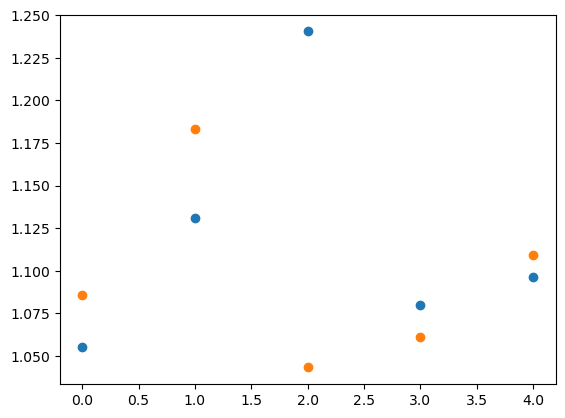

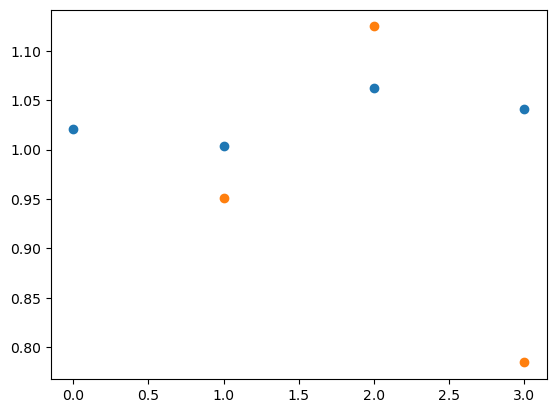

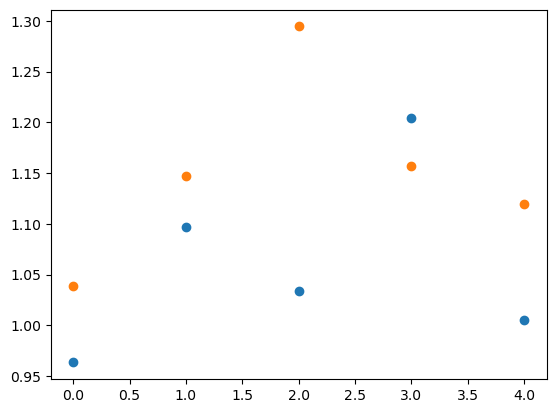

In [192]:
plt.plot(hp_YB_A_lw/hp_YB_B_lw, 'o')
plt.plot(lp_YB_A_lw/lp_YB_B_lw, 'o')

plt.figure()
plt.plot(hp_M_A_lw/hp_M_B_lw, 'o')
plt.plot([1,2,3], lp_M_A_lw/lp_M_B_lw, 'o')

plt.figure()
plt.plot(hp_Si_A_lw/hp_Si_B_lw, 'o')
plt.plot(lp_Si_A_lw/lp_Si_B_lw, 'o')

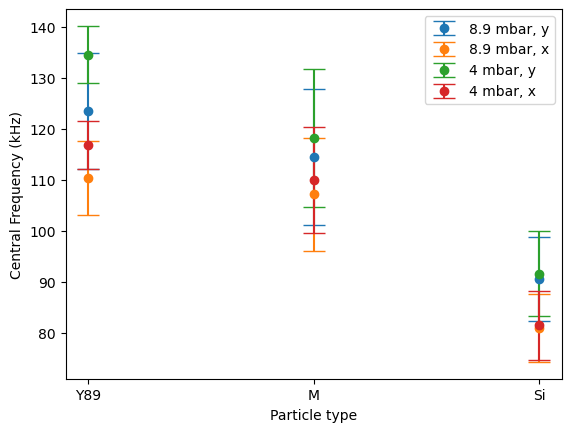

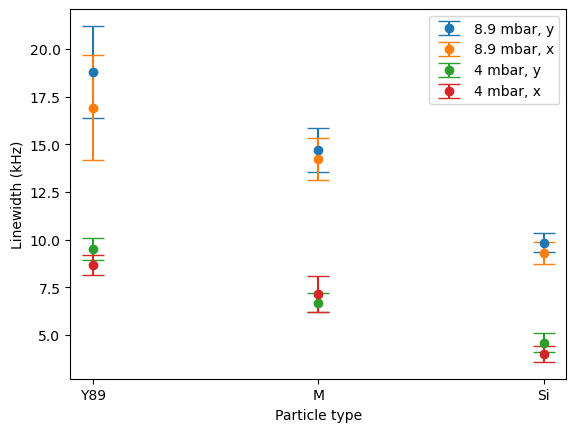

In [322]:
plt.errorbar(['Y89', 'M', 'Si'], [hp_YB_A_cf_mean, hp_M_A_cf_mean, hp_Si_A_cf_mean], yerr=[hp_YB_A_cf_std, hp_M_A_cf_std, hp_Si_A_cf_std], marker = 'o', linestyle = 'none', capsize = 8, label = '8.9 mbar, y')
plt.errorbar(['Y89', 'M', 'Si'], [hp_YB_B_cf_mean, hp_M_B_cf_mean, hp_Si_B_cf_mean], yerr=[hp_YB_B_cf_std, hp_M_B_cf_std, hp_Si_B_cf_std], marker = 'o', linestyle = 'none', capsize = 8, label = '8.9 mbar, x')
plt.errorbar(['Y89', 'M', 'Si'], [lp_YB_A_cf_mean, lp_M_A_cf_mean, lp_Si_A_cf_mean], yerr=[lp_YB_A_cf_std, lp_M_A_cf_std, lp_Si_A_cf_std], marker = 'o', linestyle = 'none', capsize = 8, label = '4 mbar, y')
plt.errorbar(['Y89', 'M', 'Si'], [lp_YB_B_cf_mean, lp_M_B_cf_mean, lp_Si_B_cf_mean], yerr=[lp_YB_B_cf_std, lp_M_B_cf_std, lp_Si_B_cf_std], marker = 'o', linestyle = 'none', capsize = 8, label = '4 mbar, x')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Particle type')
plt.legend()

plt.figure()
plt.errorbar(['Y89', 'M', 'Si'], [hp_YB_A_lw_mean, hp_M_A_lw_mean, hp_Si_A_lw_mean], yerr=[hp_YB_A_lw_std, hp_M_A_lw_std, hp_Si_A_lw_std], marker = 'o', linestyle = 'none', capsize = 8, label = '8.9 mbar, y')
plt.errorbar(['Y89', 'M', 'Si'], [hp_YB_B_lw_mean, hp_M_B_lw_mean, hp_Si_B_lw_mean], yerr=[hp_YB_B_lw_std, hp_M_B_lw_std, hp_Si_B_lw_std], marker = 'o', linestyle = 'none', capsize = 8, label = '8.9 mbar, x')
plt.errorbar(['Y89', 'M', 'Si'], [lp_YB_A_lw_mean, lp_M_A_lw_mean, lp_Si_A_lw_mean], yerr=[lp_YB_A_lw_std, lp_M_A_lw_std, lp_Si_A_lw_std], marker = 'o', linestyle = 'none', capsize = 8, label = '4 mbar, y')
plt.errorbar(['Y89', 'M', 'Si'], [lp_YB_B_lw_mean, lp_M_B_lw_mean, lp_Si_B_lw_mean], yerr=[lp_YB_B_lw_std, lp_M_B_lw_std, lp_Si_B_lw_std], marker = 'o', linestyle = 'none', capsize = 8, label = '4 mbar, x')
plt.ylabel('Linewidth (kHz)')
plt.xlabel('Particle type')
plt.legend()

In [213]:
def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

PSDAs, PSDBs = make_PSDs(filepathSi, extensionsSi_2, ['A', 'B'])

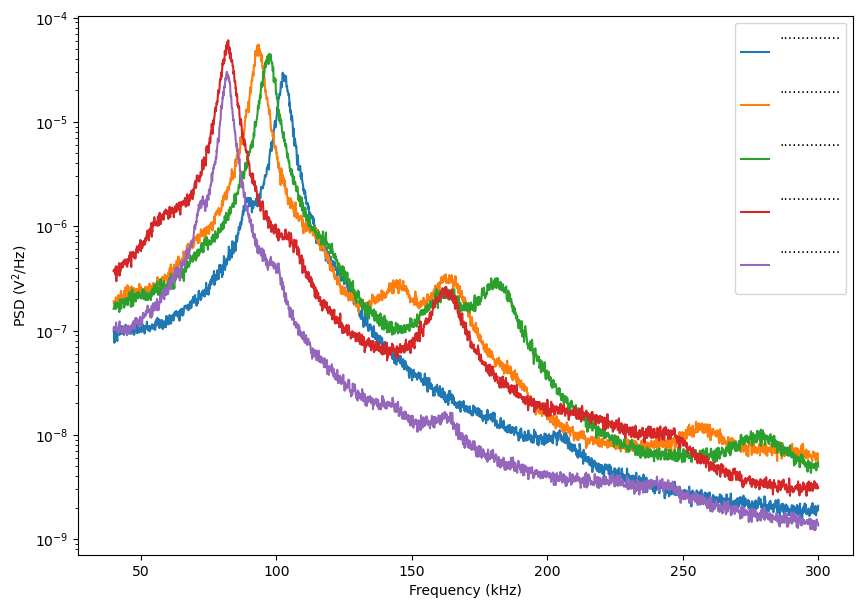

In [236]:
lb = 400
ub = 3000
plt.figure(figsize = (10, 7))
plt.plot(PSDAs[0][0][lb:ub]/1000, PSDAs[0][1][lb:ub], label = '..............\n\n')
plt.plot(PSDAs[0][0][lb:ub]/1000, PSDAs[1][1][lb:ub], label = '..............\n\n')
plt.plot(PSDAs[0][0][lb:ub]/1000, PSDAs[2][1][lb:ub], label = '..............\n\n')
plt.plot(PSDAs[0][0][lb:ub]/1000, PSDAs[3][1][lb:ub], label = '..............\n\n')
plt.plot(PSDAs[0][0][lb:ub]/1000, PSDAs[4][1][lb:ub], label = '..............\n\n')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()

In [240]:
import matplotlib.image as img

In [262]:
Pic1 = img.imread('D:\\Experiment\\Trapping\\230628\\Silica\\Particle 1\\Pic.png')
Pic2 = img.imread('D:\\Experiment\\Trapping\\230628\\Silica\\Particle 2\\Pic.png')
Pic4 = img.imread('D:\\Experiment\\Trapping\\230628\\Silica\\Particle 4\\Pic.png')
Pic5 = img.imread('D:\\Experiment\\Trapping\\230628\\Silica\\Particle 5\\Pic.png')
Pic6 = img.imread('D:\\Experiment\\Trapping\\230628\\Silica\\Particle 6\\Pic.png')

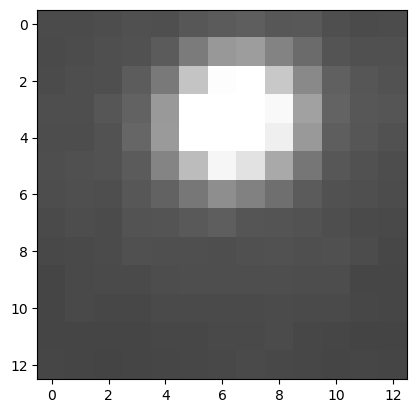

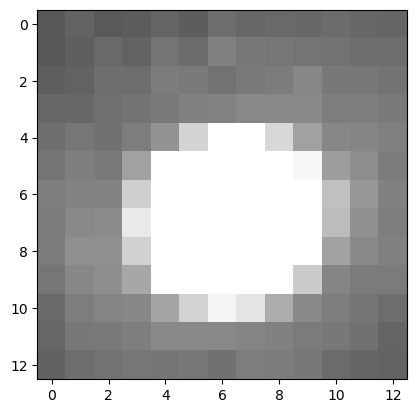

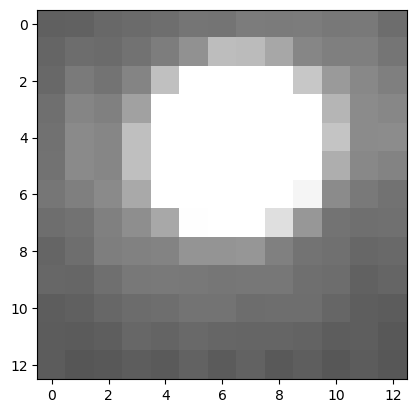

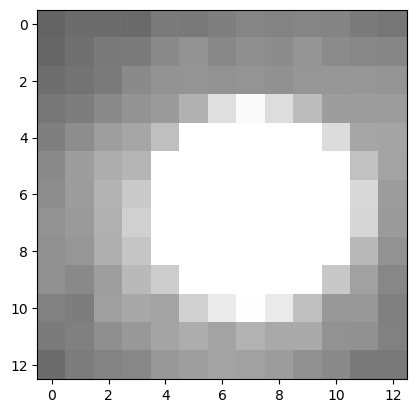

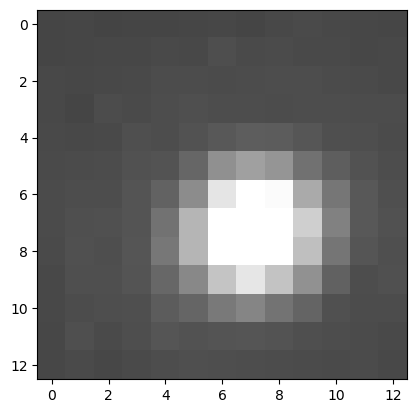

In [276]:
plt.imshow(Pic1[289:302, 1032:1045])
plt.figure()
plt.imshow(Pic2[289:302, 1032:1045])
plt.figure()
plt.imshow(Pic4[289:302, 1032:1045])
plt.figure()
plt.imshow(Pic5[289:302, 1032:1045])
plt.figure()
plt.imshow(Pic6[289:302, 1032:1045])

In [272]:
print(sum(Pic1[289:302, 1032:1045]))

[[ 3.7529411  3.7529411  3.7529411 13.       ]
 [ 3.831372   3.831372   3.831372  13.       ]
 [ 3.9019608  3.9019608  3.9019608 13.       ]
 [ 4.2235293  4.2235293  4.2235293 13.       ]
 [ 5.0313725  5.0313725  5.0313725 13.       ]
 [ 6.6078434  6.6078434  6.6078434 13.       ]
 [ 7.3058825  7.3058825  7.3058825 13.       ]
 [ 7.1960783  7.1960783  7.1960783 13.       ]
 [ 6.4745097  6.4745097  6.4745097 13.       ]
 [ 5.1333337  5.1333337  5.1333337 13.       ]
 [ 4.1882353  4.1882353  4.1882353 13.       ]
 [ 3.9333336  3.9333336  3.9333336 13.       ]
 [ 3.8352945  3.8352945  3.8352945 13.       ]]


In [281]:
print(sum(sum(sum(Pic1[289:302, 1032:1045]))))
print(sum(sum(sum(Pic2[289:302, 1032:1045]))))
print(sum(sum(sum(Pic4[289:302, 1032:1045]))))
print(sum(sum(sum(Pic5[289:302, 1032:1045]))))
print(sum(sum(sum(Pic6[289:302, 1032:1045]))))

365.24708557128906
471.01177978515625
458.54119873046875
520.2353363037109
362.05883026123047


In [283]:
extensionsSi_4

['Particle 1\\tt4.mat',
 'Particle 2\\tt4.mat',
 'Particle 5\\tt4.mat',
 'Particle 6\\tt4.mat']

In [292]:
def make_PSDs(filepath, extensions, channels):
    PSDs = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSDs_sub = []
        for i in tts:
            PSD = scisig.welch(i, fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
            PSDs_sub.append(PSD)
        PSDs.append(PSDs_sub)
    PSDs = np.array(PSDs)
    return PSDs

In [315]:
PSDs = make_PSDs(filepathSi, ['Particle 6\\tt4.mat', 'Particle 6\\tt6.mat'], ['A', 'B', 'C'])

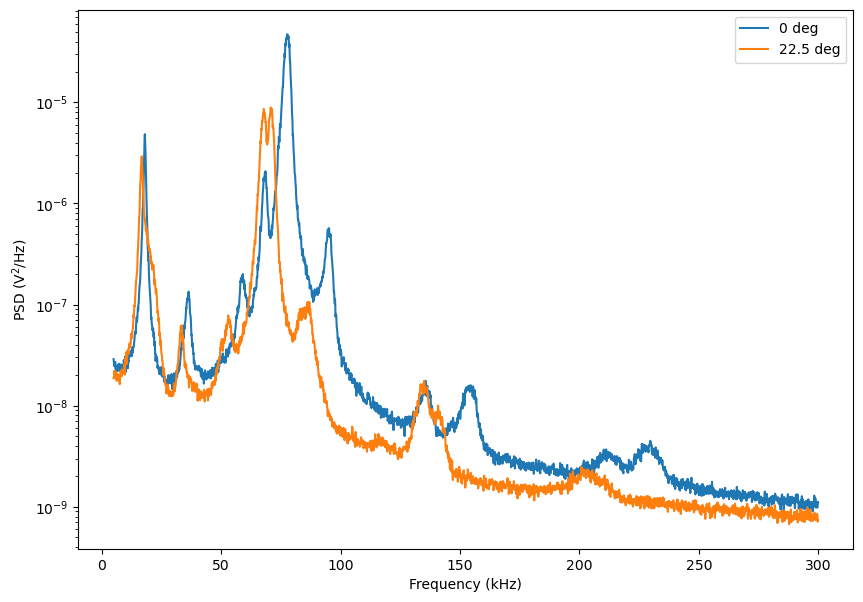

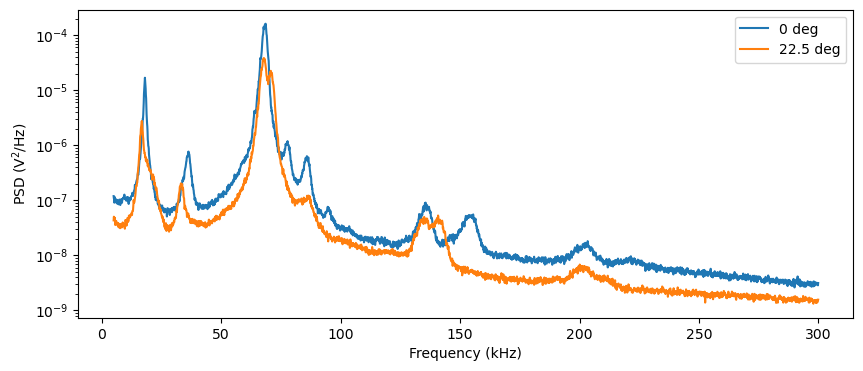

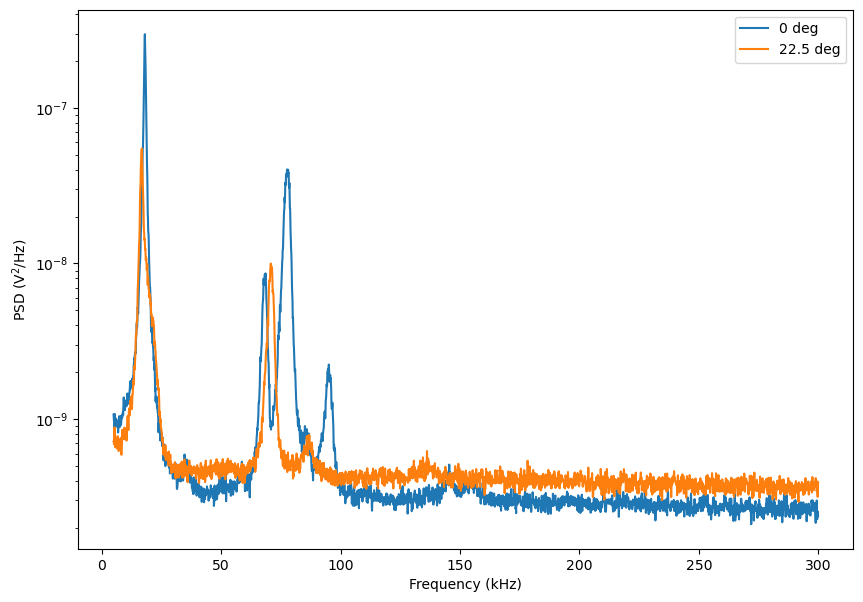

In [316]:
lb = 50
ub = 3000
plt.figure(figsize = (10, 7))
plt.plot(PSDs[0][0][0][lb:ub]/1000, PSDs[0][0][1][lb:ub], label = '0 deg')
plt.plot(PSDs[1][0][0][lb:ub]/1000, PSDs[1][0][1][lb:ub], label = '22.5 deg')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()

lb = 50
ub = 3000
plt.figure(figsize = (10, 4))
plt.plot(PSDs[0][1][0][lb:ub]/1000, PSDs[0][1][1][lb:ub], label = '0 deg')
plt.plot(PSDs[1][1][0][lb:ub]/1000, PSDs[1][1][1][lb:ub], label = '22.5 deg')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()

lb = 50
ub = 3000
plt.figure(figsize = (10, 7))
plt.plot(PSDs[0][2][0][lb:ub]/1000, PSDs[0][2][1][lb:ub], label = '0 deg')
plt.plot(PSDs[1][2][0][lb:ub]/1000, PSDs[1][2][1][lb:ub], label = '22.5 deg')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()

In [317]:
PSDs = make_PSDs(filepathSi, ['Particle 2\\tt4.mat', 'Particle 2\\tt5.mat'], ['A', 'B'])

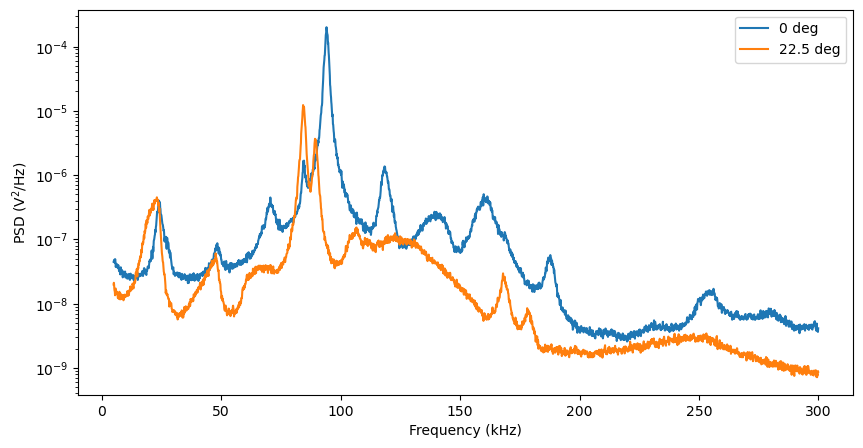

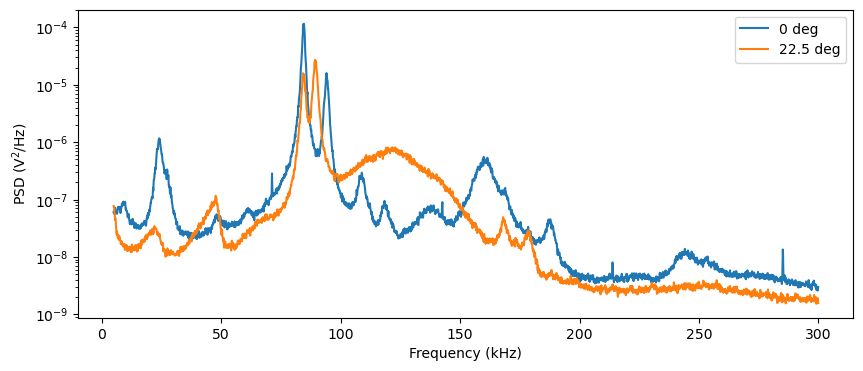

In [318]:
lb = 50
ub = 3000
plt.figure(figsize = (10, 5))
plt.plot(PSDs[0][0][0][lb:ub]/1000, PSDs[0][0][1][lb:ub], label = '0 deg')
plt.plot(PSDs[1][0][0][lb:ub]/1000, PSDs[1][0][1][lb:ub], label = '22.5 deg')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()

lb = 50
ub = 3000
plt.figure(figsize = (10, 4))
plt.plot(PSDs[0][1][0][lb:ub]/1000, PSDs[0][1][1][lb:ub], label = '0 deg')
plt.plot(PSDs[1][1][0][lb:ub]/1000, PSDs[1][1][1][lb:ub], label = '22.5 deg')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()

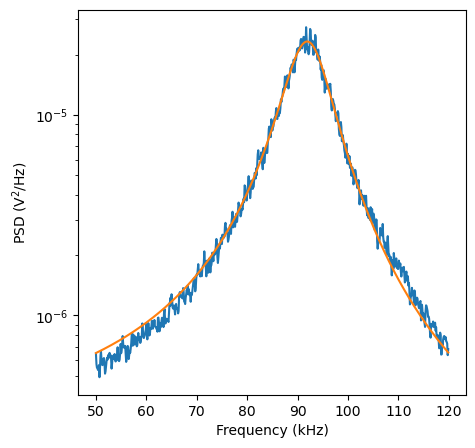

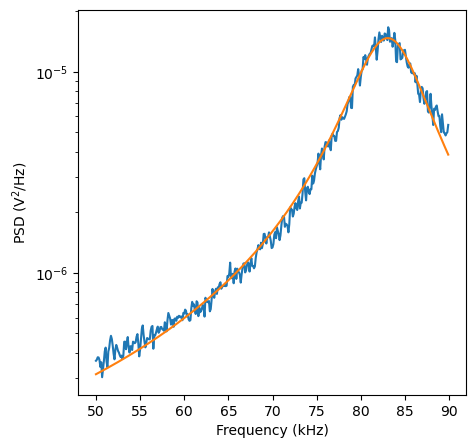

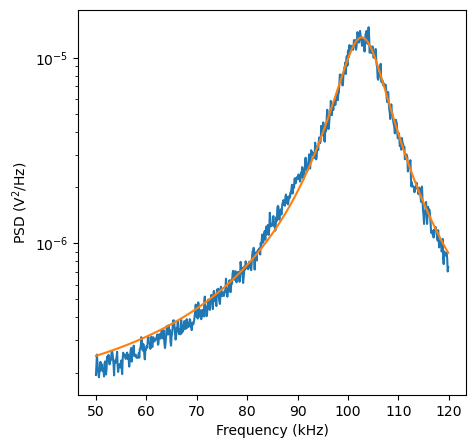

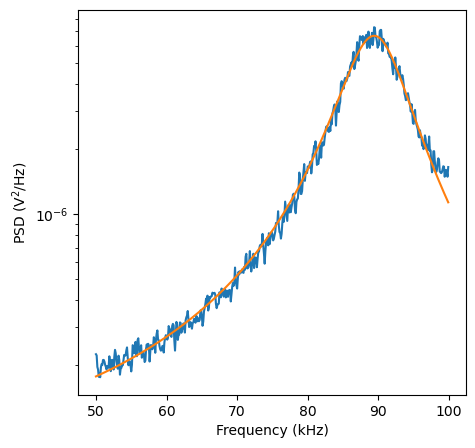

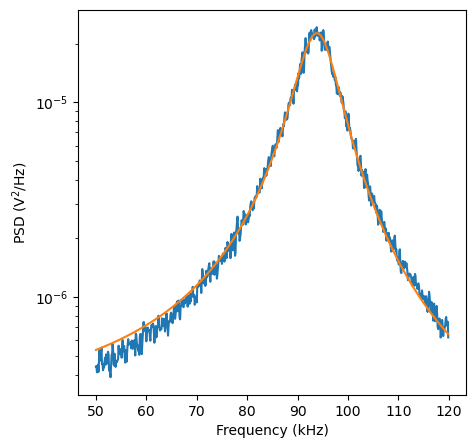

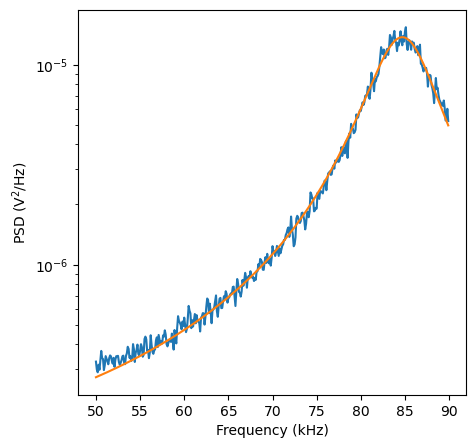

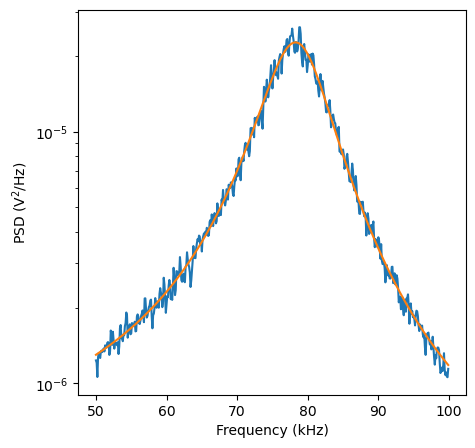

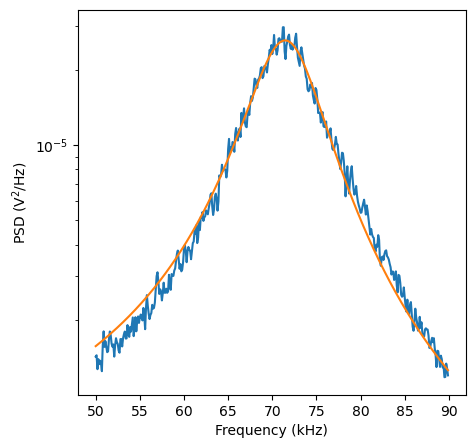

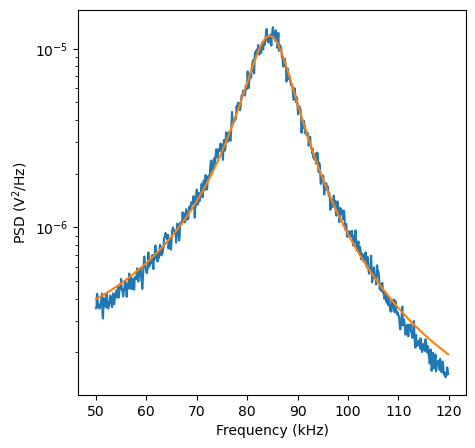

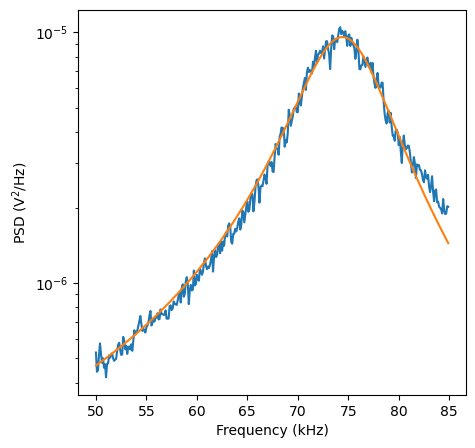

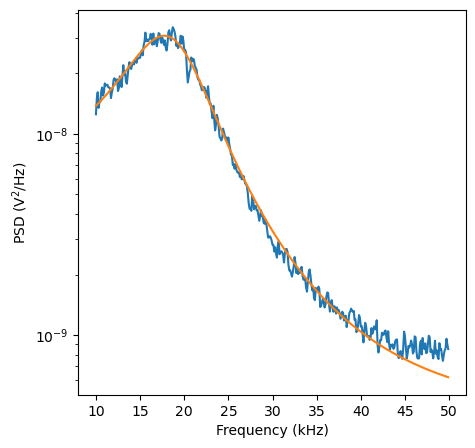

In [367]:
PSDs = make_PSDs(filepathSi, ['Particle 2\\tt1.mat'], ['A', 'B'])
lb = 500
ub = 1200
p0 = [1e5, 1e14, 1e4, 1e-10]
PSD2_fitsx, PSD2_fittedx = fit_and_plot_PSD([PSDs[0][0]], lb, ub, p0)
lb = 500
ub = 900
PSD2_fitsy, PSD2_fittedy = fit_and_plot_PSD([PSDs[0][1]], lb, ub, p0)
xyratio21 = PSD2_fitsx[0][2]/PSD2_fitsy[0][2]

PSDs = make_PSDs(filepathSi, ['Particle 1\\tt1.mat'], ['A', 'B'])
lb = 500
ub = 1200
p0 = [1e5, 1e14, 1e4, 1e-10]
PSD2_fitsx, PSD2_fittedx = fit_and_plot_PSD([PSDs[0][0]], lb, ub, p0)
lb = 500
ub = 1000
PSD2_fitsy, PSD2_fittedy = fit_and_plot_PSD([PSDs[0][1]], lb, ub, p0)
xyratio11 = PSD2_fitsx[0][2]/PSD2_fitsy[0][2]

PSDs = make_PSDs(filepathSi, ['Particle 4\\tt1.mat'], ['A', 'B'])
lb = 500
ub = 1200
p0 = [1e5, 1e14, 1e4, 1e-10]
PSD2_fitsx, PSD2_fittedx = fit_and_plot_PSD([PSDs[0][0]], lb, ub, p0)
lb = 500
ub = 900
PSD2_fitsy, PSD2_fittedy = fit_and_plot_PSD([PSDs[0][1]], lb, ub, p0)
xyratio41 = PSD2_fitsx[0][2]/PSD2_fitsy[0][2]

PSDs = make_PSDs(filepathSi, ['Particle 5\\tt1.mat'], ['A', 'B'])
lb = 500
ub = 1000
p0 = [0.8e5, 1e14, 1e4, 1e-10]
PSD2_fitsx, PSD2_fittedx = fit_and_plot_PSD([PSDs[0][0]], lb, ub, p0)
lb = 500
ub = 900
PSD2_fitsy, PSD2_fittedy = fit_and_plot_PSD([PSDs[0][1]], lb, ub, p0)
xyratio51 = PSD2_fitsx[0][2]/PSD2_fitsy[0][2]

PSDs = make_PSDs(filepathSi, ['Particle 6\\tt1.mat'], ['A', 'B', 'C'])
lb = 500
ub = 1200
p0 = [1e5, 1e14, 1e4, 1e-10]
PSD2_fitsx, PSD2_fittedx = fit_and_plot_PSD([PSDs[0][0]], lb, ub, p0)
lb = 500
ub = 850
PSD2_fitsy, PSD2_fittedy = fit_and_plot_PSD([PSDs[0][1]], lb, ub, p0)
lb = 100
ub = 500
p0 = [2e4, 1e14, 1e4, 1e-10]
PSD2_fitsz, PSD2_fittedz = fit_and_plot_PSD([PSDs[0][2]], lb, ub, p0)
xyratio61 = PSD2_fitsx[0][2]/PSD2_fitsy[0][2]
xzratio61 = PSD2_fitsx[0][2]/PSD2_fitsz[0][2]

In [368]:
print(xyratio11)
print(xyratio21)
print(xyratio41)
print(xyratio51)
print(xyratio61)
print(xzratio61)

0.9811229217166222
1.1801036170094914
1.1171202421705635
1.1833030336840096
1.0029240934814565
0.9264566342688879


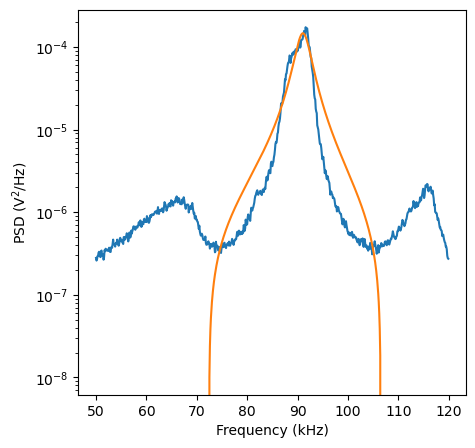

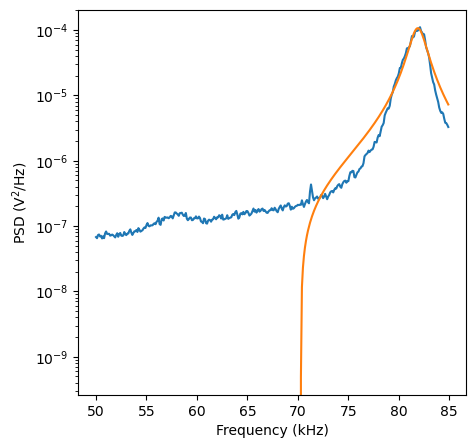

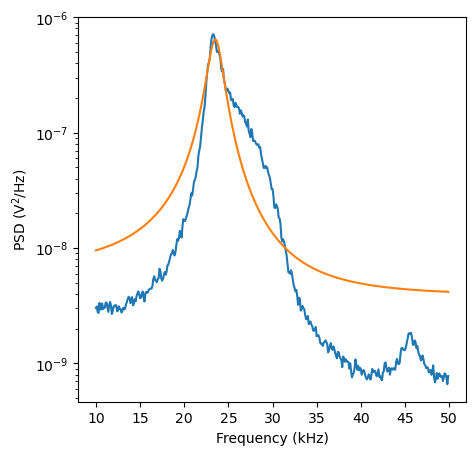

-1.919978508035472
1.8259083001648104


In [369]:
PSDs = make_PSDs(filepathSi, ['Particle 5\\tt5.mat'], ['A', 'B', 'C'])
lb = 500
ub = 1200
p0 = [1e5, 1e14, 1e4, 1e-10]
PSD2_fitsx, PSD2_fittedx = fit_and_plot_PSD([PSDs[0][0]], lb, ub, p0)
lb = 500
ub = 850
PSD2_fitsy, PSD2_fittedy = fit_and_plot_PSD([PSDs[0][1]], lb, ub, p0)
lb = 100
ub = 500
p0 = [2e4, 1e14, 1e4, 1e-10]
PSD2_fitsz, PSD2_fittedz = fit_and_plot_PSD([PSDs[0][2]], lb, ub, p0)
print(PSD2_fitsx[0][2]/PSD2_fitsy[0][2])
print(PSD2_fitsx[0][2]/PSD2_fitsz[0][2])